In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def conduccion_1d(k, S, L, TA, TB, N):
    """
    PARAMETERS 
    ----------
     L = float
     L es la longitud del dominio
     
    k = float
    es la conductividad del material
    
    S: float
    es la fuente.
    
    TA: float
    Es la condición de la frontera izquierda
    
    TB: float
    Es la condición de frontera a la derecha 

    N: int
    es el número de nodos internos (grados de libertad).
    
    Return
    ------
    al final esta función dibuja la solución.
    """
    
    H = L / (N+1)

    T = np.zeros(N+2)
    b = np.zeros(N)
    A = np.zeros((N,N))

    r = k / H**2
    b[:] = S / r
    T[0] = TA
    T[-1] = TB
    b[0] += TA
    b[-1] += TB

    A[0,0]=2
    A[0,1]=-1

    for i in range(1,N-1):
        A[i,i] = 2
        A[i,i+1] = -1
        A[i,i-1] = -1
    A[-1,-2] = -1
    A[-1,-1] = 2
    
    T[1:N+1] = np.linalg.solve(A,b)
    plt.plot(T, 'o-') 
    plt.show()

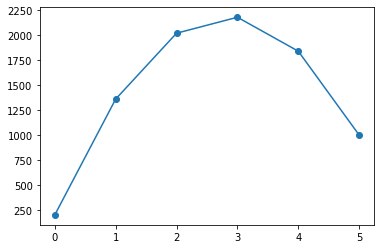

In [14]:
conduccion_1d(0.02, 10.0, 5.0, 200, 1000, 4)

In [15]:
import ipywidgets as widgets 

In [16]:
w = widgets.interactive(conduccion_1d,
                k = widgets.fixed(0.02),
                S = widgets.fixed(0.0), 
                L = widgets.fixed(5.0), 
                TA = widgets.fixed(200), 
                TB = widgets.fixed(1000), 
                N = widgets.IntSlider(max=10, min=4, value=4))

In [17]:
display(w)

interactive(children=(IntSlider(value=4, description='N', max=10, min=4), Output()), _dom_classes=('widget-int…

In [18]:
w = widgets.interactive(conduccion_1d,
                k = widgets.fixed(0.02),
                S = widgets.FloatSlider(max=1.0, min=0.0, value=0.2),
                L = widgets.fixed(5.0), 
                TA = widgets.fixed(200), 
                TB = widgets.fixed(1000), 
                N = widgets.IntSlider(max=10, min=4, value=4))

In [19]:
display(w)

interactive(children=(FloatSlider(value=0.2, description='S', max=1.0), IntSlider(value=4, description='N', ma…

In [ ]:
####### Fin #######